# Banxi_Bedding_Analysis

This Jupyter notebook examines bedding data collected from the Banxi Group in the Guizhou Province of South China, and calculates a mean bedding for each paleomagnetic site.

#### import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet
from functions import fisher_mean
from functions import make_di_block
%matplotlib inline

#### import the bedding data

Plane orientations are recorded as RHR strike and dip, and are already declination corrected.

In [2]:
bedding = pd.read_csv('PM_Bedding_List.csv')

## Calculations

#### convert strike/dip to pole trend-plunge

In [3]:
bedding['dip_direction'] = (bedding['strike'] + 90) % 360
bedding['pole_trend'] = (bedding['dip_direction'] + 180) % 360
bedding['pole_plunge'] = 90 - bedding['dip']

#### extract all unique keys in the bedding data

Keys represent a subset of a nominal site or a set of nominal sites that share the same bedding orientations.

In [4]:
key_labels = []
for i in bedding['key']:
    if i not in key_labels:
        key_labels.append(i)
N = len(key_labels)
print('Number of unique keys: ' + str(N))

Number of unique keys: 38


#### for each unique key, calculate the Fisher mean

In [5]:
key_fpars = []

for i in range(N):
    
    # extract all data for a particular key
    this_bedding = bedding[bedding['key'] == key_labels[i]]
    
    # make a 'di_block'
    di_block = make_di_block(this_bedding['pole_trend'].tolist(), this_bedding['pole_plunge'].tolist())
    
    # calculate the Fisher mean
    this_fpars = fisher_mean(di_block)
    
    # store the calculations
    key_fpars.append(this_fpars)

#### create a dataframe with the calculations, and save the results to a .csv

In [6]:
mean_bedding = pd.DataFrame(key_labels, columns = ['key'])

for i in range(N):
    
    # the calculations made by the fisher_mean function
    mean_bedding.loc[i,'alpha95'] = key_fpars[i]['alpha95']
    mean_bedding.loc[i,'csd'] = key_fpars[i]['csd']
    mean_bedding.loc[i,'dec'] = key_fpars[i]['dec']
    mean_bedding.loc[i,'inc'] = key_fpars[i]['inc']
    mean_bedding.loc[i,'k'] = key_fpars[i]['k']
    mean_bedding.loc[i,'n'] = key_fpars[i]['n']
    mean_bedding.loc[i,'r'] = key_fpars[i]['r']
    
    # convert dec and inc into dip direction, strike, dip
    mean_bedding.loc[i,'dip_direction'] = (key_fpars[i]['dec'] + 180) % 360
    mean_bedding.loc[i,'strike'] = round(((mean_bedding['dip_direction'][i] - 90) % 360), 1)
    mean_bedding.loc[i,'dip'] = round((90 - key_fpars[i]['inc']), 1)
    
mean_bedding.to_csv('PM_Mean_Bedding_List.csv', index=False)
mean_bedding

,key,alpha95,csd,dec,inc,k,n,r,dip_direction,strike,dip
0,16TR001_16TR002,1.298790,1.898655,226.871902,37.768378,1820.027941,8.0,7.996154,46.871902,316.9,52.2
1,16TR003,2.289491,2.766182,232.840377,37.839527,857.449627,6.0,5.994169,52.840377,322.8,52.2
2,16TR004,2.668229,4.467281,83.843359,59.826956,328.763393,10.0,9.972625,263.843359,173.8,30.2
3,16TR005,9.105260,12.087454,291.582161,45.345344,44.905588,7.0,6.866386,111.582161,21.6,44.7
4,16TR006_16TR007_16TR008_16TR009,1.687174,4.181778,212.554701,45.719759,375.187353,20.0,19.949359,32.554701,302.6,44.3
5,16TR010_16TR011,2.692448,4.507709,200.017016,47.460443,322.892793,10.0,9.972127,20.017016,290.0,42.5
6,16TR012,2.609930,2.299950,223.766998,50.753126,1240.318043,4.0,3.997581,43.766998,313.8,39.2
7,16TR013,2.060157,2.180049,201.495011,66.264327,1380.503707,5.0,4.997103,21.495011,291.5,23.7
8,16TR014_16TR015,3.387302,3.582331,163.796378,60.650425,511.256224,5.0,4.992176,343.796378,253.8,29.3
9,16TR016,1.719236,1.515377,310.981604,46.504356,2857.122717,4.0,3.998950,130.981604,41.0,43.5


## Plotting

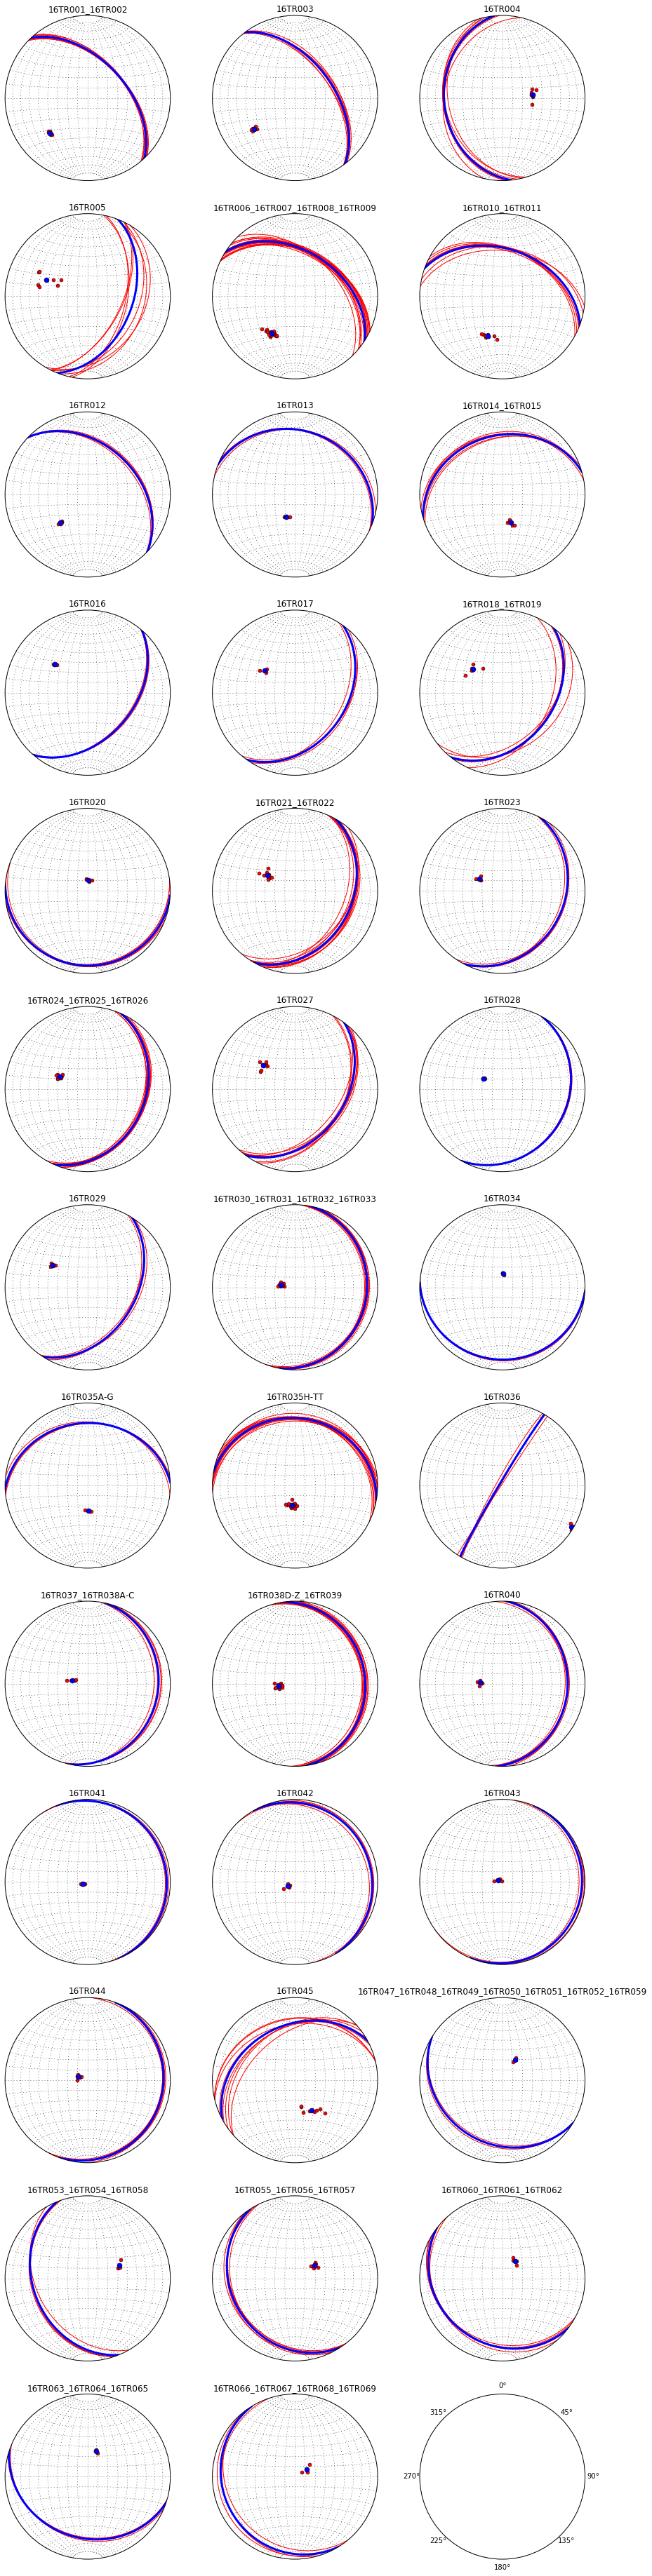

In [7]:
# the number of rows in the plot
if (N/3 - int(N/3)) > 0.01:
    numfigrows = int(N/3) + 1
else:
    numfigrows = int(N/3)

# initiate the figure
fig, axs = plt.subplots(numfigrows, 3, figsize=(15,(numfigrows*5)), subplot_kw={'projection':'stereonet'})

# plot each key
row = 0
col = 0
for i in range(N):
    
    # extract raw data for a key
    this_bedding = bedding[bedding['key'] == key_labels[i]]
    
    # plot the raw data
    axs[row][col].plane(this_bedding['strike'], this_bedding['dip'], 'r-', linewidth=1)
    axs[row][col].pole(this_bedding['strike'], this_bedding['dip'], 'ro', markersize=5)
    
    # plot the mean data
    axs[row][col].plane(mean_bedding['strike'][i], mean_bedding['dip'][i], 'b-', linewidth=3)
    axs[row][col].pole(mean_bedding['strike'][i], mean_bedding['dip'][i], 'bo', markersize=7)
    
    # prettify
    axs[row][col].grid()
    axs[row][col].set_title(key_labels[i])
    axs[row][col].set_azimuth_ticklabels([])
    
    # move to the next axis
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1
        
plt.show(fig)